In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets, naive_bayes
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [3]:
listing = pd.read_csv("data/listings.csv")

In [4]:
print(listing.columns.values)

['id' 'listing_url' 'scrape_id' 'last_scraped' 'name' 'summary' 'space'
 'description' 'experiences_offered' 'neighborhood_overview' 'notes'
 'transit' 'access' 'interaction' 'house_rules' 'thumbnail_url'
 'medium_url' 'picture_url' 'xl_picture_url' 'host_id' 'host_url'
 'host_name' 'host_since' 'host_location' 'host_about'
 'host_response_time' 'host_response_rate' 'host_acceptance_rate'
 'host_is_superhost' 'host_thumbnail_url' 'host_picture_url'
 'host_neighbourhood' 'host_listings_count' 'host_total_listings_count'
 'host_verifications' 'host_has_profile_pic' 'host_identity_verified'
 'street' 'neighbourhood' 'neighbourhood_cleansed'
 'neighbourhood_group_cleansed' 'city' 'state' 'zipcode' 'market'
 'smart_location' 'country_code' 'country' 'latitude' 'longitude'
 'is_location_exact' 'property_type' 'room_type' 'accommodates'
 'bathrooms' 'bedrooms' 'beds' 'bed_type' 'amenities' 'square_feet'
 'price' 'weekly_price' 'monthly_price' 'security_deposit' 'cleaning_fee'
 'guests_include

In [5]:
listing.review_scores_cleanliness.unique()

array([10.,  9., nan,  7.,  8.,  6.,  2.,  5.,  4.,  3.])

In [6]:
df = pd.read_csv("data/listing_data_clean_final_v2_extra.csv")

In [7]:
df.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_duration_days', 'listing_duration_days', 'region',
       'occupancy_rate', 'crime_rate', 'hangers', 'washer', 'tv', 'detector',
       'kitchen', 'heating', 'essentials', 'iron', 'wi

### Data Cleaning

In [8]:
df=df.drop(['host_total_listings_count','number_of_reviews','reviews_per_month','host_is_superhost'],axis=1)

In [10]:
bed_type=pd.get_dummies(df['bed_type'],prefix='bed_type',drop_first=True)
df=pd.concat([df,bed_type],axis=1)
cancellation_policy=pd.get_dummies(df['cancellation_policy'],prefix='cancellation_policy',drop_first=True)
df=pd.concat([df,cancellation_policy],axis=1)
region=pd.get_dummies(df['region'],prefix='region',drop_first=True)
df=pd.concat([df,region],axis=1)
property_room_type=pd.get_dummies(df['property_room_type'],prefix='property_room_type',drop_first=True)
df=pd.concat([df,property_room_type],axis=1)

df=df.drop(['property_type','room_type','bed_type','cancellation_policy','region','property_room_type','latitude',
            'longitude','property_room_type_Others_Entire home/apt', 'property_room_type_Others_Hotel room',
            'property_room_type_Others_Private room','property_room_type_Others_Shared room'],axis=1)

### Parameter Selection

In [11]:
x = df[['host_response_rate', 'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews_ltm', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_duration_days',
       'listing_duration_days', 'occupancy_rate', 'crime_rate', 'hangers',
       'washer', 'tv', 'detector', 'kitchen', 'heating', 'essentials', 'iron',
       'wifi', 'dryer', 'min_dist_subway', 'min_dist_park',
       'min_dist_attraction', 'recency', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'region_East', 'region_North',
       'region_South', 'region_West',
       'property_room_type_Apartment_Hotel room',
       'property_room_type_Apartment_Private room',
       'property_room_type_Apartment_Shared room',
       'property_room_type_Bungalow_Entire home/apt',
       'property_room_type_Bungalow_Private room',
       'property_room_type_Bungalow_Shared room',
       'property_room_type_Guesthouse_Entire home/apt',
       'property_room_type_Guesthouse_Hotel room',
       'property_room_type_Guesthouse_Private room',
       'property_room_type_Guesthouse_Shared room',
       'property_room_type_Hotel_Entire home/apt',
       'property_room_type_Hotel_Hotel room',
       'property_room_type_Hotel_Private room',
       'property_room_type_Hotel_Shared room']]
y = df['rating_class']

In [12]:
df.rating_class.value_counts()

2    50118
1     5434
0     2084
Name: rating_class, dtype: int64

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = x.select_dtypes(include=numerics)
numerical_cols = numerical.columns

In [14]:
df[numerical_cols].describe()

,host_response_rate,host_acceptance_rate,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,...,kitchen,heating,essentials,iron,wifi,dryer,min_dist_subway,min_dist_park,min_dist_attraction,recency
count,57636.000000,57636.000000,57636.000000,57636.000000,57636.00000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,...,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000,57636.000000
mean,0.571354,0.677360,0.997415,0.389479,0.69009,3.226907,1.295640,1.397338,1.748872,105.034354,...,0.917708,0.960424,0.955028,0.805556,0.973211,0.838296,1049.077268,11378.863962,11359.936546,347.432785
std,0.470711,0.394608,0.050779,0.487636,0.46246,1.970470,0.593854,0.882589,1.256607,90.324988,...,0.274812,0.194962,0.207244,0.395776,0.161467,0.368183,1503.902458,5244.719393,5439.748352,420.469006
min,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.774875,167.735457,46.259545,0.000000
25%,0.000000,0.400000,1.000000,0.000000,0.00000,2.000000,1.000000,1.000000,1.000000,45.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,330.472496,7796.732004,7473.369216,75.000000
50%,0.900000,0.890000,1.000000,0.000000,1.00000,2.000000,1.000000,1.000000,1.000000,80.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,565.437999,10899.282654,10849.629813,162.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,4.000000,1.500000,2.000000,2.000000,130.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1045.497681,14254.515266,14480.794510,456.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,16.000000,17.000000,22.000000,28.000000,800.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21463.237214,37267.358645,37124.994930,18398.000000


In [15]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k = 10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 5 best features

                                          Specs         Score
15                               maximum_nights  2.220320e+08
23                           host_duration_days  2.968768e+05
24                        listing_duration_days  1.950719e+05
40                                      recency  1.928220e+05
39                          min_dist_attraction  1.351445e+05
37                              min_dist_subway  1.187257e+05
20  calculated_host_listings_count_entire_homes  1.164064e+05
38                                min_dist_park  9.562325e+04
10                             security_deposit  3.399514e+04
16                        number_of_reviews_ltm  1.135719e+04


### Logistic Model

#### OVR Model

In [16]:
x = df[["maximum_nights", "host_duration_days", "listing_duration_days", "recency", "min_dist_attraction", "min_dist_subway", 
        "calculated_host_listings_count_entire_homes", "min_dist_park", "security_deposit", "number_of_reviews_ltm"]]

y = df['rating_class']

In [17]:
y.value_counts()

2    50118
1     5434
0     2084
Name: rating_class, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 610)

In [19]:
grid_values = {'C':[0.001,0.01,1,5,10,25,100]}
grid_clf_acc = model_selection.GridSearchCV(linear_model.LogisticRegression(solver='lbfgs', multi_class = 'ovr'), grid_values,cv= model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2019))
grid_clf_acc.fit(x_train, y_train)
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)

0.8698924339655573
{'C': 0.01}


In [29]:
#Fit a multi-class logistic regression model with one-v.s.-rest
ovr_estimator = linear_model.LogisticRegression(
    solver = 'lbfgs',
    multi_class = 'ovr', C = 0.01)
ovr_estimator.fit(x_train, y_train)

ovr_predict = ovr_estimator.predict(x_test)

ovr_report = """
The evaluation report of OVR is:
Confusion Matrix:
{}
Accuracy: {}
""".format(metrics.confusion_matrix(y_test, ovr_predict),
           metrics.accuracy_score(y_test, ovr_predict))
print(ovr_report)
print('The classification report of OVR:\n {}'
      .format(metrics.classification_report(y_test, ovr_predict)))


The evaluation report of OVR is:
Confusion Matrix:
[[    0     0   433]
 [    0     0  1086]
 [    0     3 10006]]
Accuracy: 0.8679736294240111

The classification report of OVR:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       433
           1       0.00      0.00      0.00      1086
           2       0.87      1.00      0.93     10009

    accuracy                           0.87     11528
   macro avg       0.29      0.33      0.31     11528
weighted avg       0.75      0.87      0.81     11528



In [30]:
# Binarize the output
y_test = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test.shape[1]

y_score = ovr_estimator.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

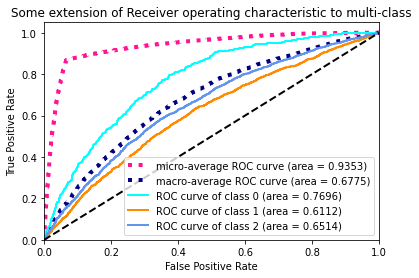

In [31]:
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [32]:
from sklearn.metrics import roc_auc_score

y_prob = ovr_estimator.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.677380 (macro),
0.652012 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.677380 (macro),
0.652012 (weighted by prevalence)


In [33]:
# importance = ovr_estimator.coef_[0]
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

In [34]:
# perform permutation importance
results = permutation_importance(ovr_estimator,x_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
importancedf = pd.DataFrame(importance)
importancedf.columns=['Score']
x_col=pd.DataFrame(x.columns)
x_col.columns=['Labels']
feature_importance = pd.concat([importancedf,x_col],axis=1)
feature_importance.sort_values('Score',ascending = False, inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

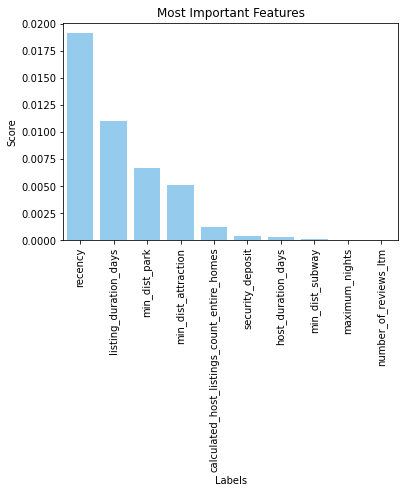

In [35]:
plot1 = sns.barplot(data = feature_importance, x = 'Labels',y = 'Score',
                    order = feature_importance['Labels'], color='lightskyblue').set_title('Most Important Features')
plt.xticks(rotation=90)

#### Softmax

In [36]:
x = df[["maximum_nights", "host_duration_days", "listing_duration_days", "recency", "min_dist_attraction", "min_dist_subway", 
        "calculated_host_listings_count_entire_homes", "min_dist_park", "security_deposit", "number_of_reviews_ltm"]]

y = df['rating_class']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 610)

In [37]:
grid_values = {'C':[0.001,0.01,1,5,10,25,100]}
grid_clf_acc = model_selection.GridSearchCV(linear_model.LogisticRegression(solver='lbfgs', multi_class = 'multinomial'), grid_values,cv= model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2019))
grid_clf_acc.fit(x_train, y_train)
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)

0.8698707419915876
{'C': 0.001}


In [38]:
sm_estimator = linear_model.LogisticRegression(
    solver = 'lbfgs',
    multi_class = 'multinomial',
    max_iter = 1000, C = 0.001)
sm_estimator.fit(x_train, y_train)

sm_predict = sm_estimator.predict(x_test)

sm_report = """
The evaluation report of Softmax is:
Confusion Matrix:
{}
Accuracy: {}
""".format(metrics.confusion_matrix(y_test, sm_predict),
           metrics.accuracy_score(y_test, sm_predict))
print(sm_report)
print('The classification report of Softmax:\n {}'
      .format(metrics.classification_report(y_test, sm_predict)))


The evaluation report of Softmax is:
Confusion Matrix:
[[    0     0   433]
 [    0     0  1086]
 [    1     1 10007]]
Accuracy: 0.868060374739764

The classification report of Softmax:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       433
           1       0.00      0.00      0.00      1086
           2       0.87      1.00      0.93     10009

    accuracy                           0.87     11528
   macro avg       0.29      0.33      0.31     11528
weighted avg       0.75      0.87      0.81     11528



In [39]:
# Binarize the output
y_test = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test.shape[1]

y_score = sm_estimator.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

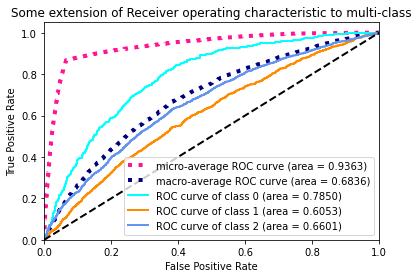

In [40]:
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [41]:
y_prob = sm_estimator.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.683446 (macro),
0.659592 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.683446 (macro),
0.659592 (weighted by prevalence)


In [42]:
# perform permutation importance
results = permutation_importance(sm_estimator,x_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
importancedf = pd.DataFrame(importance)
importancedf.columns=['Score']
x_col=pd.DataFrame(x.columns)
x_col.columns=['Labels']
feature_importance = pd.concat([importancedf,x_col],axis=1)
feature_importance.sort_values('Score',ascending = False, inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

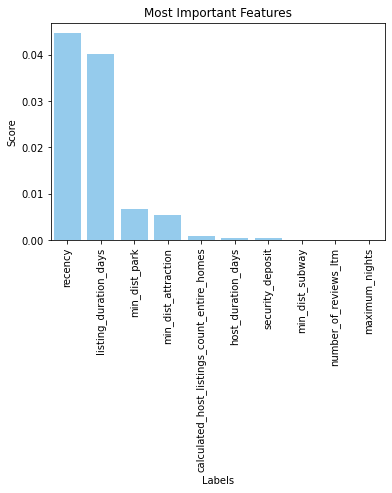

In [43]:
plot1 = sns.barplot(data = feature_importance, x = 'Labels',y = 'Score',
                    order = feature_importance['Labels'], color='lightskyblue').set_title('Most Important Features')
plt.xticks(rotation=90)

Naive Bayes

In [44]:
x = df[["maximum_nights", "host_duration_days", "listing_duration_days", "recency", "min_dist_attraction", "min_dist_subway", 
        "calculated_host_listings_count_entire_homes", "min_dist_park", "security_deposit", "number_of_reviews_ltm"]]

y = df['rating_class']

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 610)

In [45]:
grid_values = {'var_smoothing':[0.001,0.01,0.1,0.11,0.12,0.13,0.14,0.15, 0.2,0.3, 0.4,0.5,1,5,10,25,100]}
grid_clf_acc = model_selection.GridSearchCV(naive_bayes.GaussianNB(), grid_values,cv= model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2019))
grid_clf_acc.fit(x_train, y_train)
print(grid_clf_acc.best_score_)
print(grid_clf_acc.best_params_)

0.8698924292611604
{'var_smoothing': 0.1}


In [46]:
gnb = naive_bayes.GaussianNB(var_smoothing = 0.1)
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
y_pred_prob = gnb.predict_proba(x_test)
y_pred_prob = y_pred_prob[:, 1]

In [47]:
dfnew=pd.DataFrame(y_pred)
dfnew[0].value_counts()

2    11528
Name: 0, dtype: int64

In [48]:
gnb_report = """
The evaluation report of GNBftmax is:
Confusion Matrix:
{}
Accuracy: {}
""".format(metrics.confusion_matrix(y_test, y_pred),
           metrics.accuracy_score(y_test, y_pred))
print(gnb_report)
print('The classification report of GNB:\n {}'
      .format(metrics.classification_report(y_test, y_pred)))


The evaluation report of GNBftmax is:
Confusion Matrix:
[[    0     0   433]
 [    0     0  1086]
 [    0     0 10009]]
Accuracy: 0.8682338653712699

The classification report of GNB:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       433
           1       0.00      0.00      0.00      1086
           2       0.87      1.00      0.93     10009

    accuracy                           0.87     11528
   macro avg       0.29      0.33      0.31     11528
weighted avg       0.75      0.87      0.81     11528



In [49]:
# Binarize the output
y_test = label_binarize(y_test, classes=[0,1,2])
n_classes = y_test.shape[1]

y_score = gnb.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

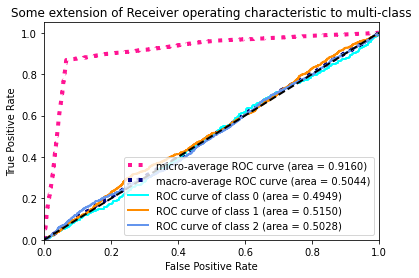

In [50]:
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [51]:
y_prob = gnb.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.504206 (macro),
0.503628 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.504206 (macro),
0.503628 (weighted by prevalence)


In [52]:
# perform permutation importance
results = permutation_importance(sm_estimator,x_train, y_train, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
importancedf = pd.DataFrame(importance)
importancedf.columns=['Score']
x_col=pd.DataFrame(x.columns)
x_col.columns=['Labels']
feature_importance = pd.concat([importancedf,x_col],axis=1)
feature_importance.sort_values('Score',ascending = False, inplace = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

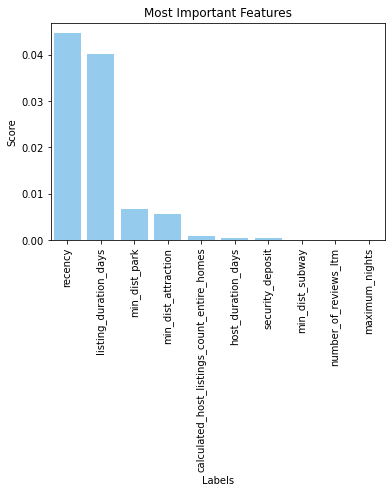

In [53]:
plot1 = sns.barplot(data = feature_importance, x = 'Labels',y = 'Score',
                    order = feature_importance['Labels'], color='lightskyblue').set_title('Most Important Features')
plt.xticks(rotation=90)